In [1]:
#COMET ML API KEY YarDlAXZLHepLKBFlSPyWbDPt
import comet_ml
comet_ml.config.save(api_key="YarDlAXZLHepLKBFlSPyWbDPt")
from comet_ml import Experiment
experiment = Experiment(
    api_key="YarDlAXZLHepLKBFlSPyWbDPt",
    project_name="asd-prediction-for-contiguous-hyp-binary-classification",
    workspace="mattbeze",
)

Saving config to "C:\Users\mattbeze\.comet.config"... done!


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mattbeze/asd-prediction-for-contiguous-hyp-binary-classification/9dbfd3933fec46c78364af21d31f193a



In [2]:
import seaborn as sn
from imblearn.over_sampling import SMOTE 
import keras
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import losses
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import class_weight
from sklearn.metrics import recall_score, confusion_matrix, multilabel_confusion_matrix, precision_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from pandas import DataFrame
import xlsxwriter
import time

seed_value = 7
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

Using TensorFlow backend.


In [3]:
Training_Data = pd.ExcelFile("Labels.xlsx") #Training Data already pre-scaled to the IBIS Data set
data = Training_Data.parse(Training_Data.sheet_names[1])
label_data = Training_Data.parse(Training_Data.sheet_names[0])
data_features = data.loc[:, data.columns]
data_features = data_features.drop(['Case','Visit','MATCH','INDEX','ASD+','ASD-','Gender'], axis=1)
data_features = data_features.dropna()
data_features = data_features.drop(['Final Label'], axis=1)
labels = label_data.loc[:, label_data.columns]
labels = labels.drop(['CASE','MATCH','INDEX','ASD+','ASD-'], axis=1)
labels = labels.dropna()
print(data_features.shape)
print(labels.shape)

(325, 298)
(325, 1)


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_features)

scaled_data.shape
labels.shape

X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, labels, test_size=0.10, random_state=seed_value)
sm = SMOTE(sampling_strategy = 'minority', random_state = seed_value, k_neighbors=2) 
X_train_smoted, Y_train_smoted = sm.fit_sample(X_train, Y_train) #Only smote the training set.

print(X_train_smoted.shape)
print(Y_train_smoted.shape)

(484, 298)
(484, 1)


COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET INFO: Ignoring automatic log_parameter('do_validation') because 'keras:do_validation' is in COMET_LOGGING_PARAMETERS_IGNORE


Train on 484 samples, validate on 33 samples
Epoch 1/250
 35/484 [=>............................] - ETA: 18s - loss: 1.3158 - acc: 0.1143

COMET INFO: Ignoring automatic log_metric('batch_batch') because 'keras:batch_batch' is in COMET_LOGGING_METRICS_IGNORE
COMET INFO: Ignoring automatic log_metric('batch_size') because 'keras:batch_size' is in COMET_LOGGING_METRICS_IGNORE


484/484 [==============================] - 2s 3ms/step - loss: 1.4807 - acc: 0.7376 - val_loss: 1.9434 - val_acc: 0.0909
Epoch 2/250
484/484 [==============================] - 0s 133us/step - loss: 1.5642 - acc: 0.5000 - val_loss: 1.9252 - val_acc: 0.0909
Epoch 3/250
484/484 [==============================] - 0s 172us/step - loss: 1.5354 - acc: 0.5000 - val_loss: 1.4916 - val_acc: 0.0909
Epoch 4/250
484/484 [==============================] - 0s 114us/step - loss: 1.3971 - acc: 0.5000 - val_loss: 1.5575 - val_acc: 0.0909
Epoch 5/250
484/484 [==============================] - 0s 112us/step - loss: 1.3716 - acc: 0.5000 - val_loss: 1.5894 - val_acc: 0.0909
Epoch 6/250
484/484 [==============================] - 0s 90us/step - loss: 1.3771 - acc: 0.5000 - val_loss: 1.5680 - val_acc: 0.0909
Epoch 7/250
484/484 [==============================] - 0s 89us/step - loss: 1.3680 - acc: 0.5000 - val_loss: 1.5574 - val_acc: 0.0909
Epoch 8/250
484/484 [==============================] - 0s 90us/step - l

Epoch 62/250
484/484 [==============================] - 0s 101us/step - loss: 1.0574 - acc: 0.5992 - val_loss: 1.3046 - val_acc: 0.2424
Epoch 63/250
484/484 [==============================] - 0s 93us/step - loss: 1.0587 - acc: 0.6136 - val_loss: 1.2726 - val_acc: 0.2424
Epoch 64/250
484/484 [==============================] - 0s 93us/step - loss: 1.0233 - acc: 0.6033 - val_loss: 1.2626 - val_acc: 0.2727
Epoch 65/250
484/484 [==============================] - 0s 90us/step - loss: 0.9789 - acc: 0.6384 - val_loss: 1.3551 - val_acc: 0.2727
Epoch 66/250
484/484 [==============================] - 0s 91us/step - loss: 1.0358 - acc: 0.6198 - val_loss: 1.2582 - val_acc: 0.2727
Epoch 67/250
484/484 [==============================] - 0s 99us/step - loss: 0.9841 - acc: 0.6364 - val_loss: 1.2658 - val_acc: 0.2727
Epoch 68/250
484/484 [==============================] - 0s 90us/step - loss: 0.9853 - acc: 0.6426 - val_loss: 1.2607 - val_acc: 0.2727
Epoch 69/250
484/484 [==============================] 

Epoch 122/250
484/484 [==============================] - 0s 101us/step - loss: 0.4740 - acc: 0.8678 - val_loss: 0.9907 - val_acc: 0.5758
Epoch 123/250
484/484 [==============================] - 0s 120us/step - loss: 0.4301 - acc: 0.8781 - val_loss: 1.0112 - val_acc: 0.6061
Epoch 124/250
484/484 [==============================] - 0s 98us/step - loss: 0.4386 - acc: 0.8802 - val_loss: 1.0248 - val_acc: 0.6061
Epoch 125/250
484/484 [==============================] - 0s 88us/step - loss: 0.4282 - acc: 0.8719 - val_loss: 1.0530 - val_acc: 0.5758
Epoch 126/250
484/484 [==============================] - 0s 118us/step - loss: 0.4335 - acc: 0.8740 - val_loss: 0.8648 - val_acc: 0.6364
Epoch 127/250
484/484 [==============================] - 0s 100us/step - loss: 0.3527 - acc: 0.9008 - val_loss: 0.9850 - val_acc: 0.6364
Epoch 128/250
484/484 [==============================] - 0s 104us/step - loss: 0.3749 - acc: 0.8946 - val_loss: 1.0843 - val_acc: 0.5455
Epoch 129/250
484/484 [====================

484/484 [==============================] - 0s 99us/step - loss: 0.1329 - acc: 0.9690 - val_loss: 0.9141 - val_acc: 0.7576
Epoch 183/250
484/484 [==============================] - 0s 88us/step - loss: 0.1190 - acc: 0.9711 - val_loss: 0.9120 - val_acc: 0.7879
Epoch 184/250
484/484 [==============================] - 0s 86us/step - loss: 0.1015 - acc: 0.9773 - val_loss: 0.9395 - val_acc: 0.7879
Epoch 185/250
484/484 [==============================] - 0s 93us/step - loss: 0.1086 - acc: 0.9731 - val_loss: 0.9916 - val_acc: 0.7576
Epoch 186/250
484/484 [==============================] - 0s 97us/step - loss: 0.1210 - acc: 0.9690 - val_loss: 0.9223 - val_acc: 0.7879
Epoch 187/250
484/484 [==============================] - 0s 93us/step - loss: 0.1199 - acc: 0.9711 - val_loss: 0.8795 - val_acc: 0.7576
Epoch 188/250
484/484 [==============================] - 0s 77us/step - loss: 0.1009 - acc: 0.9793 - val_loss: 0.9596 - val_acc: 0.7576
Epoch 189/250
484/484 [==============================] - 0s 95

Epoch 242/250
484/484 [==============================] - 0s 151us/step - loss: 0.0238 - acc: 0.9959 - val_loss: 1.0647 - val_acc: 0.7576
Epoch 243/250
484/484 [==============================] - 0s 245us/step - loss: 0.0203 - acc: 0.9979 - val_loss: 1.1805 - val_acc: 0.7576
Epoch 244/250
484/484 [==============================] - 0s 207us/step - loss: 0.0258 - acc: 0.9959 - val_loss: 1.1679 - val_acc: 0.7273
Epoch 245/250
484/484 [==============================] - 0s 220us/step - loss: 0.0306 - acc: 0.9959 - val_loss: 1.0053 - val_acc: 0.8182
Epoch 246/250
484/484 [==============================] - 0s 298us/step - loss: 0.0204 - acc: 0.9917 - val_loss: 1.0509 - val_acc: 0.7879
Epoch 247/250
484/484 [==============================] - 0s 143us/step - loss: 0.0226 - acc: 0.9979 - val_loss: 1.1342 - val_acc: 0.7576
Epoch 248/250
484/484 [==============================] - 0s 124us/step - loss: 0.0209 - acc: 1.0000 - val_loss: 1.0620 - val_acc: 0.7879
Epoch 249/250
484/484 [==================

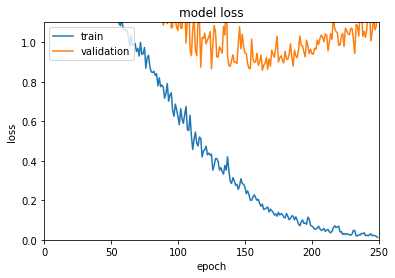

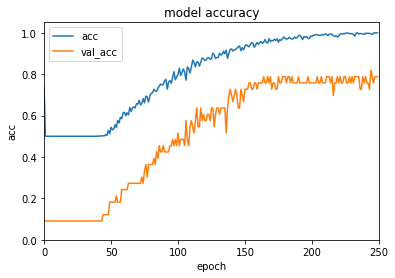

[[24  6]
 [ 1  2]]
PPV:  0.25
Recall:  0.6666666666666666


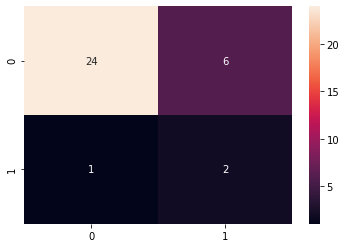

In [5]:
input_size = 298
hidden_size1 = 100
hidden_size2 = 15
output_size = 1

input_data = Input(shape=(input_size,))
hidden_d_1 = Dense(hidden_size1, activation='relu')(input_data)
hidden_d_1_d = Dropout(0.15,  noise_shape=None, seed=seed_value)(hidden_d_1)
hidden_d_2 = Dense(hidden_size2, activation='relu')(hidden_d_1_d)
predicted = Dense(output_size, activation='sigmoid')(hidden_d_2)

predictor = Model(input_data, predicted)
predictor.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'] )

class_weights={0:1, 1:5} 

p = predictor.fit(X_train_smoted, Y_train_smoted,
epochs=250,
batch_size=35,
shuffle=False,
validation_data=(X_test, Y_test), class_weight=class_weights)

#Plotting loss
plt.plot(p.history['loss'])
plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 250, 0.0, 1.10])
plt.show()

#Plotting Accuracy
plt.plot(p.history['acc'])
plt.plot(p.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 250, 0.0, 1.05])
plt.show()


predictions = predictor.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

#Heatmap for the confusion matrix
cf_matrix = confusion_matrix(Y_test, predicted_classes)
print(cf_matrix)
sn.heatmap(cf_matrix, annot=True)
average_precision = average_precision_score(predicted_classes, Y_test)


prec_score = precision_score(Y_test, predicted_classes, average=None)
print('PPV: ',prec_score[1])

rec_score = recall_score(Y_test, predicted_classes, average=None)
print('Recall: ',rec_score[1])

In [6]:
predictor.save('ASD Pre_Trained Model for HYP Contiguous')